# Bootstrap Sampling and Out-of-Bag Samples

Objective: To understand how the proportion of boostrap sample compared to original sample affects the proportion of out-of-bag samples compared to original sample

Assumption: All samples have equal probability of being selected during sampling

## Imports

In [42]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

## Investigate bootstrap sampling

Define array of bootstrap sample proportions

In [2]:
bootstrap_proportions_array = np.arange(0.1, 2.1, 0.1)
print(bootstrap_proportions_array)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


Create random sample for bootstrapping

In [7]:
np.random.seed(2018)
original_sample_array = np.random.randn(100000)
orig_size = len(original_sample_array)
print('Size of original sample:', orig_size)

Size of original sample: 100000


Perform bootstrap sampling for various sample proportion and compute OOB proportions

In [16]:
orig_index_array = np.arange(orig_size)
oob_proportion_array = np.array([]).reshape((-1, 1000))
for bootstrap_proportion in bootstrap_proportions_array:
    oob_proportion_partial = np.array([])
    for loop_no in range(1000):
        np.random.seed(loop_no)
        train_index = np.random.choice(orig_size, int(bootstrap_proportion * orig_size), replace=True)
        test_index = orig_index_array[~np.isin(orig_index_array, train_index)]
        test_prop = len(test_index) / orig_size
        oob_proportion_partial = np.append(oob_proportion_partial, test_prop)
    oob_proportion_array = np.vstack((oob_proportion_array, oob_proportion_partial))
print('Shape of oob_proportion_array:', oob_proportion_array.shape)

Shape of oob_proportion_array: (20, 1000)


## Show results

Compute mean and SD of OOB proportions

In [19]:
oob_proportion_mean = oob_proportion_array.mean(axis=1)
oob_proportion_sd = oob_proportion_array.std(axis=1)

Compute upper and lower limits for 95% confidence interval (2 SDs from mean)

In [21]:
oob_upper_limit = oob_proportion_mean + 2 * oob_proportion_sd
oob_lower_limit = oob_proportion_mean - 2 * oob_proportion_sd

Plot results

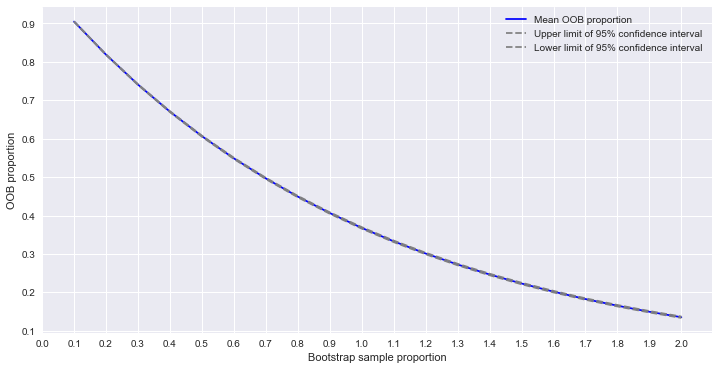

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(bootstrap_proportions_array, oob_proportion_mean, color='blue', label='Mean OOB proportion')
plt.plot(bootstrap_proportions_array, oob_upper_limit, color='gray', linestyle='dashed',
         label='Upper limit of 95% confidence interval')
plt.plot(bootstrap_proportions_array, oob_lower_limit, color='gray', linestyle='dashed',
         label='Lower limit of 95% confidence interval')
plt.xlabel('Bootstrap sample proportion')
plt.grid(True)
plt.xticks(np.arange(0.0, 2.1, 0.1))
plt.ylabel('OOB proportion')
plt.legend(loc='best')